In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m 
from scipy.integrate import quad #esto permite integrar numericamente

# Análisis de absorbancia

In [36]:
df=pd.read_excel("data/absorbancia.xlsx", skiprows=1)
df.dropna(inplace=True)

In [37]:
df.tail()

,2500,-12.8629035643531,2500.1,-9.97450312611535,2500.2,-11.7910190011994,2500.3,-14.0786256198518,2500.4,0.02678097785,2500.5,0.05104519054
2136,363.0,-1.017861,363.0,21.812223,363.0,37.827908,363.0,-0.057941,363,0.290231,363,0.911959
2141,358.0,6.399959,358.0,20.871900,358.0,28.278425,358.0,5.287653,358,0.347135,358,1.351684
2143,356.0,10.889638,356.0,21.122437,356.0,29.251258,356.0,7.835659,356,0.382940,356,1.604017
2144,355.0,13.716277,355.0,24.459212,355.0,32.953032,355.0,9.481289,355,0.400858,355,1.718295
2145,354.0,17.035827,354.0,24.419472,354.0,37.492144,354.0,10.978215,354,0.435693,354,1.777779


In [38]:
df.describe()

,2500,-12.8629035643531,2500.1,-9.97450312611535,2500.2,-11.7910190011994,2500.3,-14.0786256198518,0.02678097785
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,1429.985975,-13.119826,1429.985975,-8.278378,1429.985975,-9.481956,1429.985975,-12.651837,0.105910
std,617.644752,1.299952,617.644752,2.720065,617.644752,3.564840,617.644752,1.515017,0.067076
min,354.000000,-13.954346,354.000000,-9.985930,354.000000,-11.792577,354.000000,-14.077287,0.026579
25%,895.500000,-13.333029,895.500000,-9.203069,895.500000,-10.990952,895.500000,-13.329343,0.057139
50%,1430.000000,-13.274125,1430.000000,-8.468931,1430.000000,-10.002415,1430.000000,-12.885310,0.090786
75%,1964.500000,-13.081935,1964.500000,-8.260554,1964.500000,-8.800172,1964.500000,-12.466750,0.130067
max,2499.000000,17.035827,2499.000000,28.193137,2499.000000,37.827908,2499.000000,10.978215,0.435693


Vamos a eliminar las columnas repetidas que son los valores de la longitud de onda, sólo dejaremos una. 

In [39]:
df = df.T.drop_duplicates().T #el comando .T transpone la matriz, pues el comando drop_duplicates() solo elimina filas duplicadas 

df

,2500,-12.8629035643531,-9.97450312611535,-11.7910190011994,-14.0786256198518,0.02678097785,0.05104519054
0,2499.0,-12.863434,-9.976166,-11.792134,-14.076977,0.028173,0.052449
1,2498.0,-12.857931,-9.98593,-11.792577,-14.076042,0.028794,0.053012
2,2497.0,-12.862071,-9.974612,-11.79226,-14.076475,0.027509,0.051711
3,2496.0,-12.865329,-9.97431,-11.791113,-14.077287,0.026715,0.050643
4,2495.0,-12.864191,-9.970086,-11.786419,-14.076506,0.026579,0.050834
...,...,...,...,...,...,...,...
2136,363.0,-1.017861,21.812223,37.827908,-0.057941,0.290231,0.911959
2141,358.0,6.399959,20.8719,28.278425,5.287653,0.347135,1.351684
2143,356.0,10.889638,21.122437,29.251258,7.835659,0.38294,1.604017
2144,355.0,13.716277,24.459212,32.953032,9.481289,0.400858,1.718295


In [40]:
df.columns=["wl","Garmanato", "Matriz_Pr", "Matriz_TiO2", "Matriz_Completa", "Matriz_Completa_2", "otro"]

In [41]:
df.describe()

,wl,Garmanato,Matriz_Pr,Matriz_TiO2,Matriz_Completa,Matriz_Completa_2,otro
count,2139.0,2139.000000,2139.00000,2139.000000,2139.000000,2139.000000,2139.000000
unique,2139.0,2135.000000,2138.00000,2139.000000,2139.000000,2139.000000,2138.000000
top,2499.0,-12.835066,-8.61169,-11.792134,-14.076977,0.028173,0.051401
freq,1.0,2.000000,2.00000,1.000000,1.000000,1.000000,2.000000


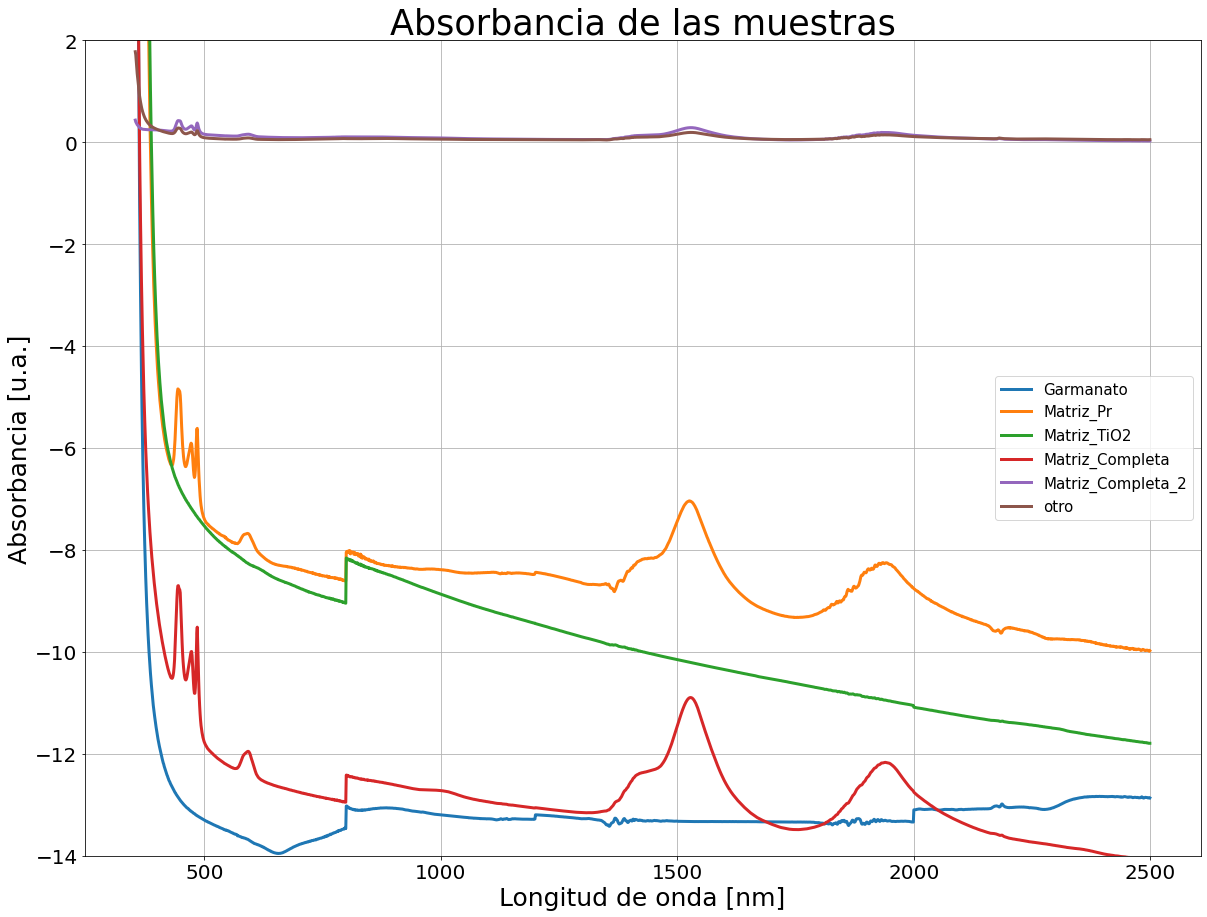

In [42]:
fig, ax=plt.subplots(1,1, figsize=(20,15))

for i in range(1,7):
    ax.plot(df.iloc[:,0], df.iloc[:,i], lw=3, label=df.columns[i])

ax.set_xlabel("Longitud de onda [nm]", fontsize=25)
ax.set_ylabel("Absorbancia [u.a.]", fontsize=25)
ax.set_title("Absorbancia de las muestras", fontsize=35)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(-14,2)
ax.grid()
ax.legend(fontsize=15)
plt.show()

# Análisis de transmitancia

In [43]:
df1=pd.read_excel("data/transmitancia.xlsx", skiprows=range(1, 5))
df1.dropna(inplace=True)
df1 = df1.rename(columns={'Filename-->': 'wl'})
df1

,wl,Ag.TRM8,Ag2.TRM8,AgAngulo45.TRM8,AgAngulo45_Pol.TRM8,AgAngulo45_VPol.TRM8,AgCurved.TRM8,AgCurvedHori.TRM8,AgCurvedVerPol.TRM8,Ag_PolHori.TRM8,...,Ag_PolVertical.TRM8,Matriz.TRM8,MatrizPrCercaEspectofotometro.TRM8,MatrizPrO5Rep2.TRM8,MatrizPrRep.TRM8,PrTiO2.TRM8,PrTiO2Rep.TRM8,TiO2.TRM8,TiO2Rep.TRM8,matrizPr.TRM8
1,172.20639,75.146472,79.681787,1.510781,-0.752416,1.534572,15.812640,4.404461,3.381413,33.115244,...,27.411154,92.755393,17.338291,12.381503,24.538293,7.753160,10.337547,12.455019,21.427510,18.102603
2,172.805359,74.748172,80.196042,2.233825,0.637884,1.884097,14.735364,6.056203,5.231141,34.871807,...,27.958525,91.968572,20.215255,14.525749,22.554982,11.479447,10.110090,13.341379,22.857918,19.178386
3,173.404282,74.900564,81.315810,3.141684,1.597430,2.490801,14.717207,5.236850,4.062706,34.486207,...,29.793888,93.114675,20.351818,14.342162,23.240382,10.743837,9.963202,13.862123,24.637866,19.347841
4,174.003189,74.383293,80.825983,3.509977,0.877958,1.176798,13.909976,4.694200,4.148492,34.017633,...,29.865430,90.841759,19.912761,14.029897,22.997680,10.273782,9.982366,13.883990,24.174478,18.214385
5,174.602066,75.382829,80.669326,4.017605,-0.129547,1.501412,15.668494,3.846537,2.544428,32.951338,...,30.172730,90.563032,19.621326,13.399771,23.761835,9.365554,10.763993,15.015779,23.419698,17.188174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1098.043213,89.756089,98.486952,4.249227,1.601696,2.213863,10.614083,7.117186,2.437885,71.858302,...,68.232026,102.766127,24.279417,15.017683,30.750893,14.605745,10.554185,17.918153,24.345304,26.369888
1633,1098.572876,90.495510,98.702885,4.203414,1.283547,2.408347,9.976663,7.811186,2.325582,71.637136,...,68.007655,104.229199,25.158070,14.933672,30.748149,13.872079,10.836884,18.041572,24.962689,26.562373
1634,1099.102539,90.208275,96.968196,4.348433,1.936945,3.051967,9.994882,7.833072,3.369880,71.732083,...,67.258038,102.439407,24.901137,14.513869,31.723091,13.415940,10.256968,17.237101,24.711939,26.966799
1635,1099.63208,90.097996,95.822761,4.943701,1.359563,2.180776,9.599065,7.033232,2.042083,70.596932,...,67.333976,102.686276,24.964869,14.260165,30.605689,13.666806,9.912951,17.053854,24.775079,26.428454


In [44]:
columnas=["Ag.TRM8","Ag2.TRM8",	"AgAngulo45.TRM8",	"AgAngulo45_Pol.TRM8",	"AgAngulo45_VPol.TRM8",	"AgCurved.TRM8",	"AgCurvedHori.TRM8",	
          "AgCurvedVerPol.TRM8",	"Ag_PolHori.TRM8",	"Ag_PolHoriVer.TRM8",	"Ag_PolVertical.TRM8"]
df1 = df1.drop(columnas, axis=1)

In [45]:
df1

,wl,Matriz.TRM8,MatrizPrCercaEspectofotometro.TRM8,MatrizPrO5Rep2.TRM8,MatrizPrRep.TRM8,PrTiO2.TRM8,PrTiO2Rep.TRM8,TiO2.TRM8,TiO2Rep.TRM8,matrizPr.TRM8
1,172.20639,92.755393,17.338291,12.381503,24.538293,7.753160,10.337547,12.455019,21.427510,18.102603
2,172.805359,91.968572,20.215255,14.525749,22.554982,11.479447,10.110090,13.341379,22.857918,19.178386
3,173.404282,93.114675,20.351818,14.342162,23.240382,10.743837,9.963202,13.862123,24.637866,19.347841
4,174.003189,90.841759,19.912761,14.029897,22.997680,10.273782,9.982366,13.883990,24.174478,18.214385
5,174.602066,90.563032,19.621326,13.399771,23.761835,9.365554,10.763993,15.015779,23.419698,17.188174
...,...,...,...,...,...,...,...,...,...,...
1632,1098.043213,102.766127,24.279417,15.017683,30.750893,14.605745,10.554185,17.918153,24.345304,26.369888
1633,1098.572876,104.229199,25.158070,14.933672,30.748149,13.872079,10.836884,18.041572,24.962689,26.562373
1634,1099.102539,102.439407,24.901137,14.513869,31.723091,13.415940,10.256968,17.237101,24.711939,26.966799
1635,1099.63208,102.686276,24.964869,14.260165,30.605689,13.666806,9.912951,17.053854,24.775079,26.428454


In [46]:
nuevos_nombres = {'Matriz.TRM8': 'M',
                  'MatrizPrCercaEspectofotometro.TRM8': 'MP',
                  'MatrizPrO5Rep2.TRM8': 'MP1',
				   "MatrizPrRep.TRM8":"MP2",
				   "PrTiO2.TRM8":"MPT",
				   "PrTiO2Rep.TRM8":"MPT1",
				   "TiO2.TRM8":"MT",
				   "TiO2Rep.TRM8":"MT1",
                   "matrizPr.TRM8":"MP3"
				}
df1 = df1.rename(columns=nuevos_nombres)

			



In [47]:
df1

,wl,M,MP,MP1,MP2,MPT,MPT1,MT,MT1,MP3
1,172.20639,92.755393,17.338291,12.381503,24.538293,7.753160,10.337547,12.455019,21.427510,18.102603
2,172.805359,91.968572,20.215255,14.525749,22.554982,11.479447,10.110090,13.341379,22.857918,19.178386
3,173.404282,93.114675,20.351818,14.342162,23.240382,10.743837,9.963202,13.862123,24.637866,19.347841
4,174.003189,90.841759,19.912761,14.029897,22.997680,10.273782,9.982366,13.883990,24.174478,18.214385
5,174.602066,90.563032,19.621326,13.399771,23.761835,9.365554,10.763993,15.015779,23.419698,17.188174
...,...,...,...,...,...,...,...,...,...,...
1632,1098.043213,102.766127,24.279417,15.017683,30.750893,14.605745,10.554185,17.918153,24.345304,26.369888
1633,1098.572876,104.229199,25.158070,14.933672,30.748149,13.872079,10.836884,18.041572,24.962689,26.562373
1634,1099.102539,102.439407,24.901137,14.513869,31.723091,13.415940,10.256968,17.237101,24.711939,26.966799
1635,1099.63208,102.686276,24.964869,14.260165,30.605689,13.666806,9.912951,17.053854,24.775079,26.428454


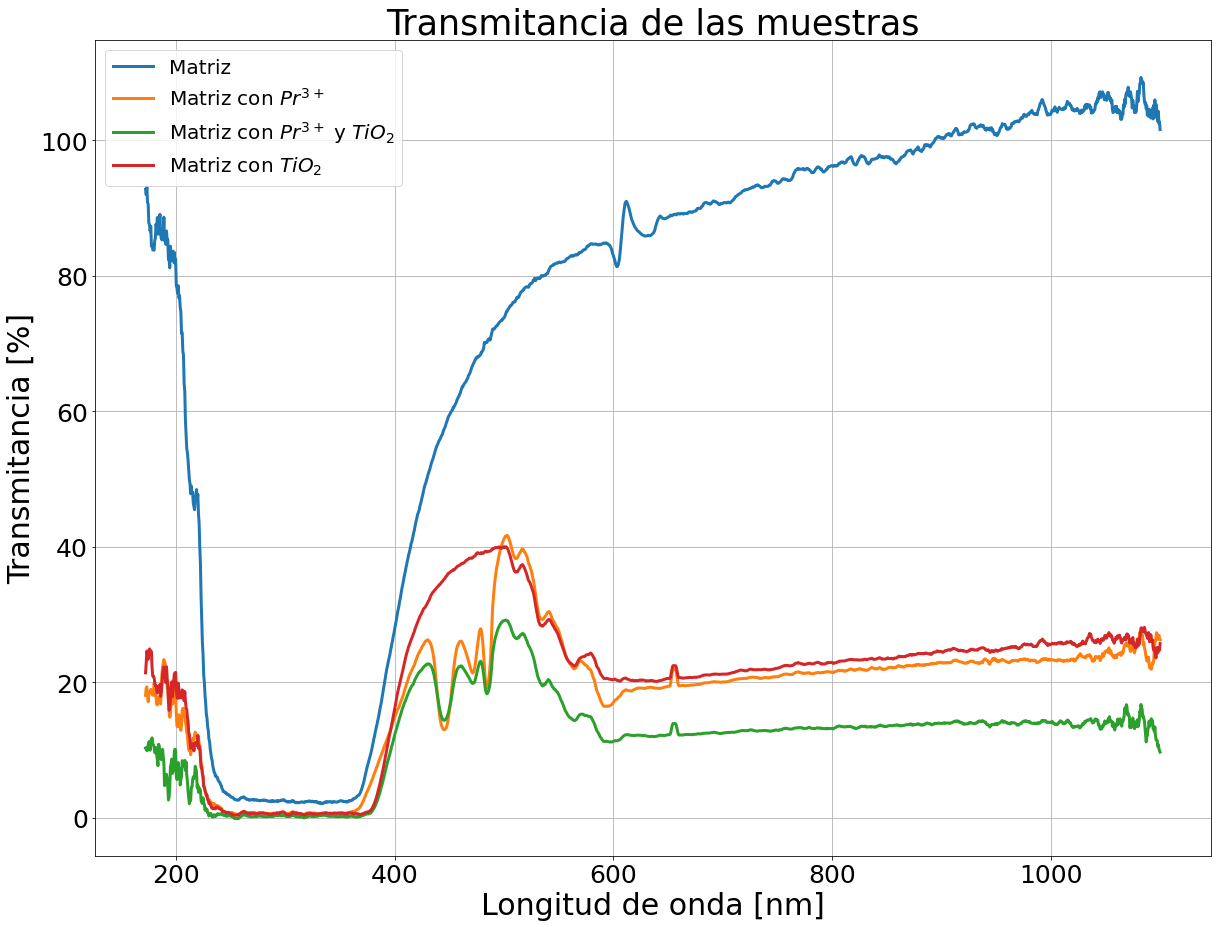

In [48]:
fig, ax=plt.subplots(1,1, figsize=(20,15))


#ax.plot(df1['wl'], df1['MP'], lw=3, label="Matriz Pr")
#ax.plot(df1['wl'], df1['MP1'], lw=3, label="Matriz Pr 1")
#ax.plot(df1['wl'], df1['MP2'], lw=3, label="Matriz Pr 2")
#ax.plot(df1['wl'], df1['MP3'], lw=3, label="Matriz Pr 3")
#ax.plot(df1['wl'], df1['MPT'], lw=3, label="Matriz T")
#ax.plot(df1['wl'], df1['MT'], lw=3, label="MT")


ax.plot(df1['wl'], df1['M'], lw=3, label="Matriz")
ax.plot(df1['wl'], df1['MP3'], lw=3, label=r"Matriz con $Pr^{3+}$")
ax.plot(df1['wl'], df1['MPT1'], lw=3, label=r"Matriz con $Pr^{3+}$ y $TiO_2$")
ax.plot(df1['wl'], df1['MT1'], lw=3, label=r"Matriz con $TiO_2$")

ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Transmitancia [%]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

ax.set_title("Transmitancia de las muestras", fontsize=35)

ax.legend(fontsize=20)
ax.grid()
plt.show()

fig.savefig("transmitancia.svg", format="svg", dpi=300)

Vamos a calcular la absorbancia usando la ley de Beer-Lambert: 

$$A=log_{10}(\frac{I_0}{I})=-log_{10}(\frac{I}{I_0})=-log_{10}(T)$$

In [49]:
dfA=df1[['wl','M', 'MP3', 'MT1','MPT1']]
cols=['wl','M', 'MP', 'MT','MPT']
dfA.columns=cols
dfA

,wl,M,MP,MT,MPT
1,172.20639,92.755393,18.102603,21.427510,10.337547
2,172.805359,91.968572,19.178386,22.857918,10.110090
3,173.404282,93.114675,19.347841,24.637866,9.963202
4,174.003189,90.841759,18.214385,24.174478,9.982366
5,174.602066,90.563032,17.188174,23.419698,10.763993
...,...,...,...,...,...
1632,1098.043213,102.766127,26.369888,24.345304,10.554185
1633,1098.572876,104.229199,26.562373,24.962689,10.836884
1634,1099.102539,102.439407,26.966799,24.711939,10.256968
1635,1099.63208,102.686276,26.428454,24.775079,9.912951


/home/juan/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


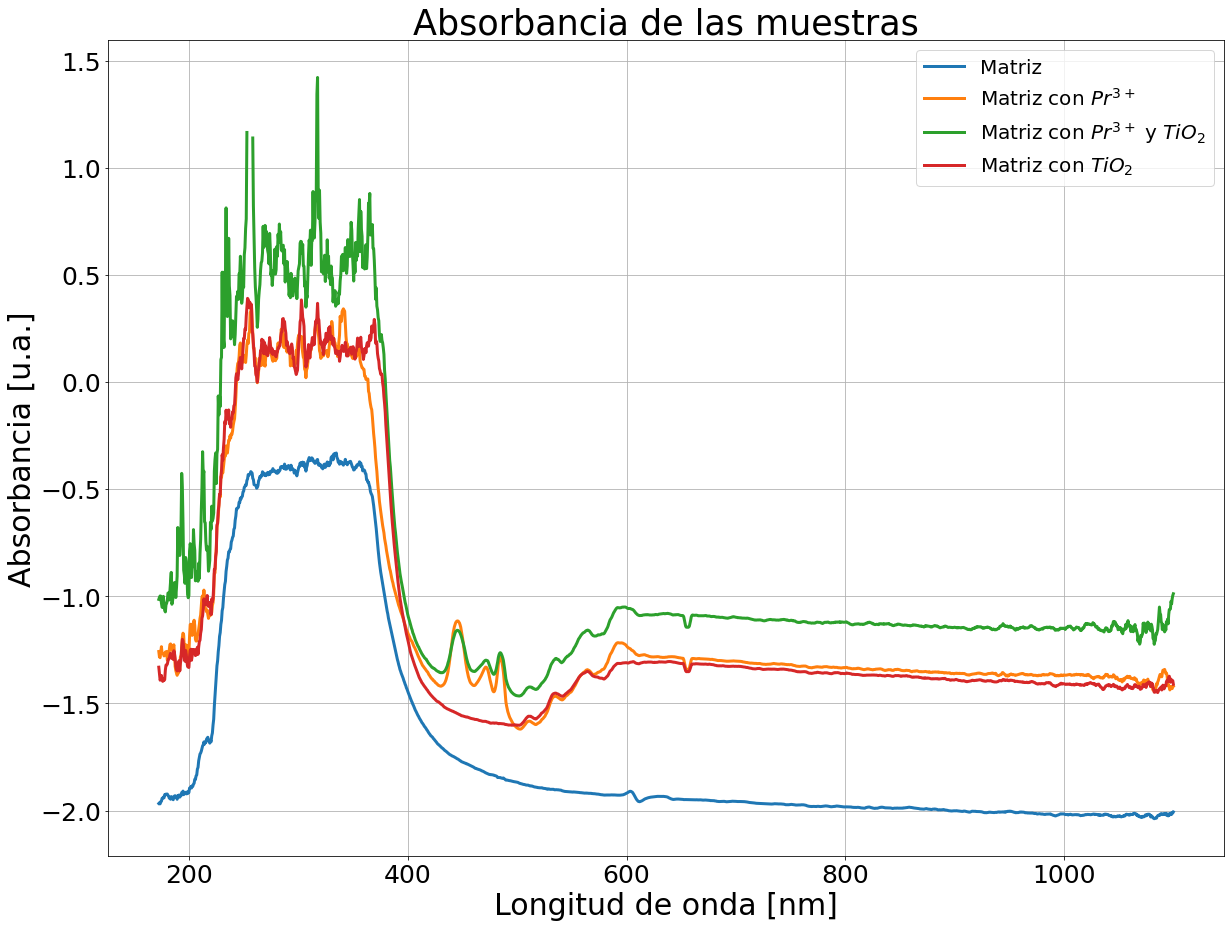

In [50]:
fig, ax=plt.subplots(1,1, figsize=(20,15))

ax.plot(df1['wl'], -np.log10(df1['M']), lw=3, label="Matriz")
ax.plot(df1['wl'], -np.log10(df1['MP3']), lw=3, label=r"Matriz con $Pr^{3+}$")
ax.plot(df1['wl'], -np.log10(df1['MPT1']), lw=3, label=r"Matriz con $Pr^{3+}$ y $TiO_2$")
ax.plot(df1['wl'], -np.log10(df1['MT1']), lw=3, label=r"Matriz con $TiO_2$")
ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Absorbancia [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

ax.set_title("Absorbancia de las muestras", fontsize=35)

ax.legend(fontsize=20)
ax.grid()
plt.show()

fig.savefig("absorbancia.svg", format="svg", dpi=300)

Vamos a calcular en bandgap de cada una de las muestras: para eso realizamos un ajuste lineal en las gráficas de absorbancia en el lado donde hay crecimiento más abrupto de la curva en la longitudes de onda largas.

In [52]:
dfA['M']=-np.log10(dfA['M'])
dfA['MP']=-np.log10(dfA['MP'])
dfA['MT']=-np.log10(dfA['MT'])
dfA['MPT']=-np.log10(dfA['MPT'])

/tmp/ipykernel_31594/3599605700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA['M']=-np.log10(dfA['M'])
/tmp/ipykernel_31594/3599605700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA['MP']=-np.log10(dfA['MP'])
/tmp/ipykernel_31594/3599605700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [57]:
def fun(x, m, b):
    return m*x+b

E_g=2.71


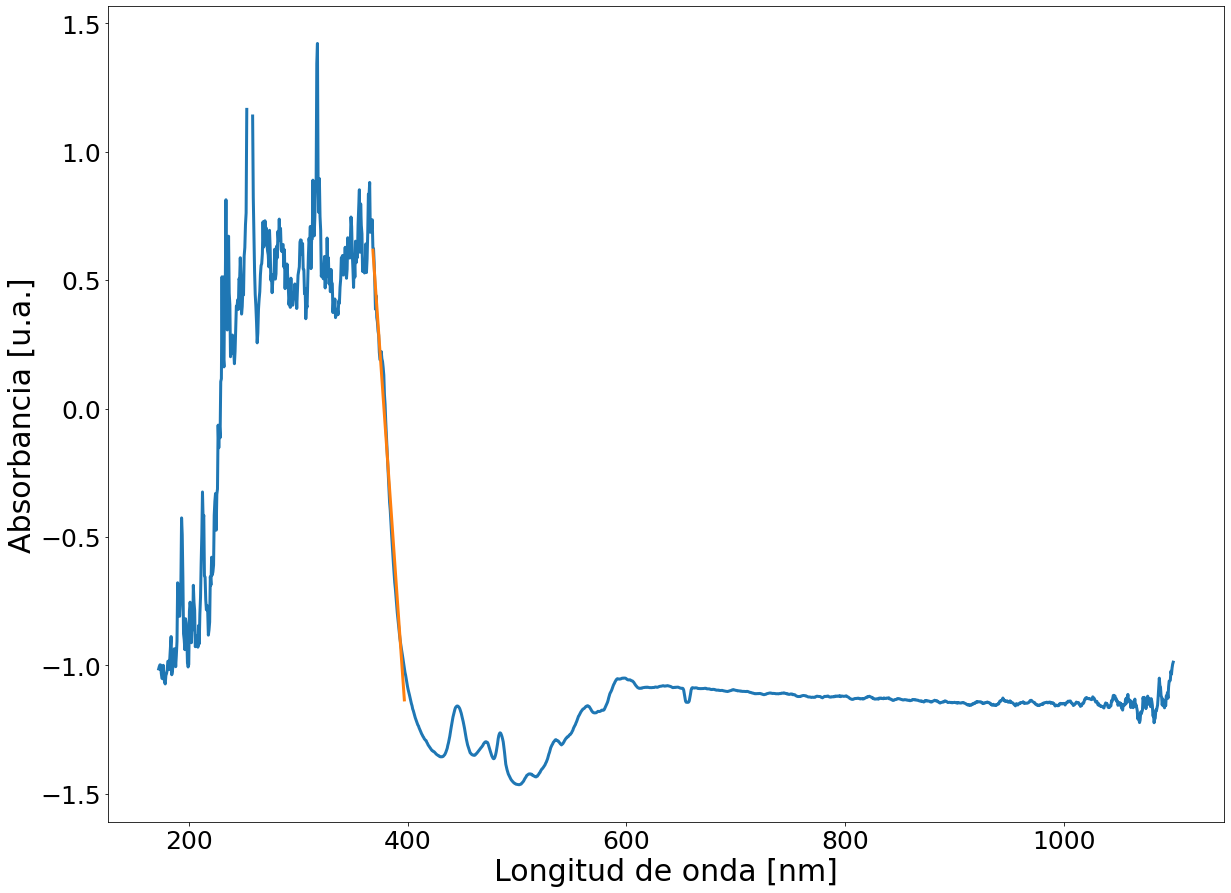

In [98]:
from scipy.optimize import curve_fit

a=330
b=380
x=dfA['wl'][a:b]
y=dfA['MPT'][a:b]

popt, pcov = curve_fit(fun, x, y)
b=popt[1]
m=popt[0]
print(r"E_g={}".format(np.round(1024/(-b/m),2)))

fig, ax=plt.subplots(1,1, figsize=(20,15))

ax.plot(dfA['wl'], dfA['MPT'], lw=3)
ax.plot(x, fun(x, *popt), lw=3, label="Ajuste")
ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Absorbancia [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.show()


# Análisis de emisión

In [71]:
df2=pd.read_csv("data/emision1.csv")
df3=pd.read_csv("data/emision2.csv")
df2=df2.T.drop_duplicates().T
df3=df3.T.drop_duplicates().T
cols=['wl', "Pr", "PrNp"]
df2.columns=cols
df3.columns=cols

In [72]:
df2.describe()

,wl,Pr,PrNp
count,1163.000000,1.163000e+03,1.163000e+03
mean,940.658596,5.083428e+05,6.922323e+05
std,92.274716,4.035805e+05,5.886160e+05
min,779.930188,1.680810e+05,1.693530e+05
25%,861.026059,1.923960e+05,2.341430e+05
50%,941.238943,2.735450e+05,4.294680e+05
75%,1020.408230,8.517955e+05,1.137798e+06
max,1099.742311,1.331717e+06,2.160201e+06


In [73]:
df2['Pr']=df2['Pr']*1e-6
df2['PrNp']=df2['PrNp']*1e-6

df3['Pr']=df3['Pr']*1e-6
df3['PrNp']=df3['PrNp']*1e-6

In [74]:
df3.describe()

,wl,Pr,PrNp
count,3833.000000,3833.000000,3833.000000
mean,651.041817,1.409218,1.446257
std,64.317241,1.332936,1.408151
min,537.236555,0.193301,0.193834
25%,595.527545,0.457392,0.442751
50%,652.030385,0.945781,0.911547
75%,706.874419,1.735795,1.853545
max,759.957576,5.578541,5.736884


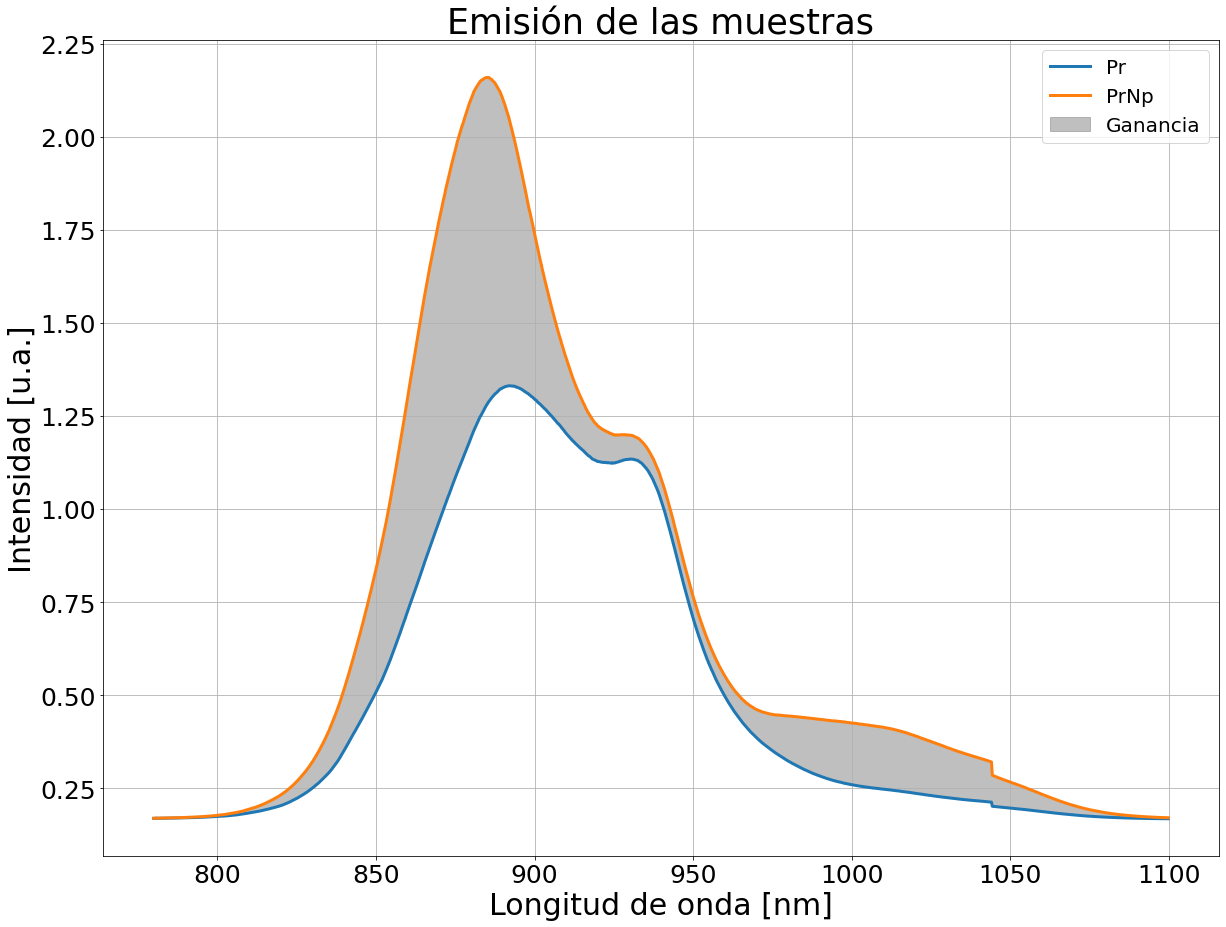

In [75]:
fig, ax=plt.subplots(1,1, figsize=(20,15))

for i in range(1,3):
    ax.plot(df2.iloc[:,0], df2.iloc[:,i], lw=3, label=df2.columns[i])

plt.fill_between(df2.iloc[:,0], df2.iloc[:,1], df2.iloc[:,2], where=(df2.iloc[:,2]> df2.iloc[:,1]), interpolate=True, alpha=0.5, color='gray', label='Ganancia')

ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Intensidad [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title("Emisión de las muestras", fontsize=35)
ax.legend(fontsize=20)
ax.grid()
plt.show()

fig.savefig("emision1.svg", dpi=300, format="svg")

In [76]:
import numpy as np
from scipy.integrate import trapz

# Supongamos que tienes tus datos en dos listas x_values y y_values

area1 = trapz(df2['Pr'], x=df2['wl'])
area2 = trapz(df2['PrNp'], x=df2['wl'])

print("Área bajo la curva:", area1)
print("Área bajo la curva:", area2)

print("Factor de ganancia:", area2/area1)

Área bajo la curva: 162.8663312842246
Área bajo la curva: 221.86157798720245
Factor de ganancia: 1.3622310777052065


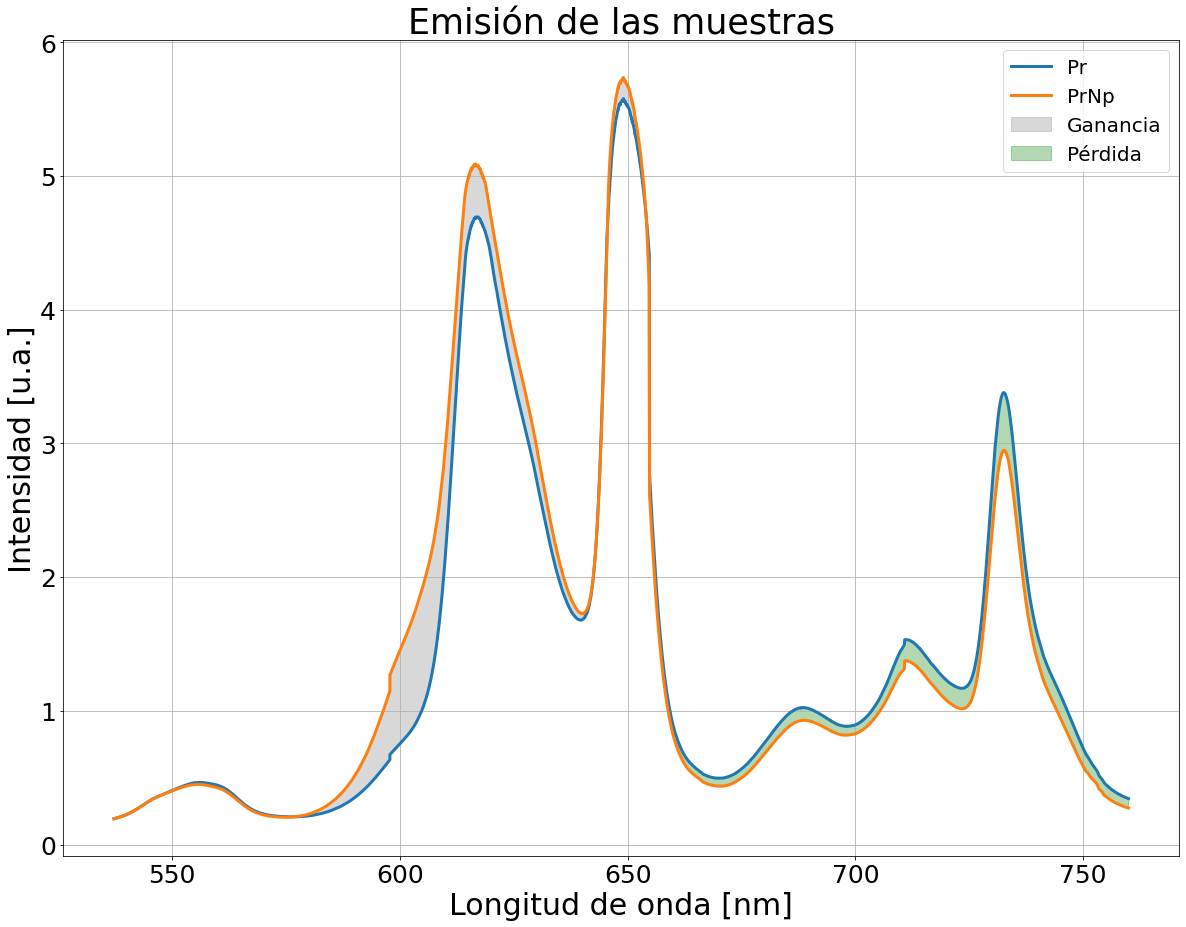

In [77]:
fig, ax=plt.subplots(1,1, figsize=(20,15))

for i in range(1,3):
    ax.plot(df3.iloc[:,0], df3.iloc[:,i], lw=3, label=df3.columns[i])

plt.fill_between(df3.iloc[:,0], df3.iloc[:,1], df3.iloc[:,2], where=(df3.iloc[:,2]> df3.iloc[:,1]), interpolate=True, alpha=0.3, color='gray', label='Ganancia')
plt.fill_between(df3.iloc[:,0], df3.iloc[:,1], df3.iloc[:,2], where=(df3.iloc[:,2]< df3.iloc[:,1]), interpolate=True, alpha=0.3, color='green', label='Pérdida')

ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Intensidad [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title("Emisión de las muestras", fontsize=35)
ax.legend(fontsize=20)
ax.grid()
plt.show()


fig.savefig("emision2.svg", dpi=300, format="svg")


In [78]:
area1 = trapz(df3['Pr'], x=df3['wl'])
area2 = trapz(df3['PrNp'], x=df3['wl'])

print("Área bajo la curva:", area1)
print("Área bajo la curva:", area2)

print("Factor de ganancia:", area2/area1)

Área bajo la curva: 312.1668267066828
Área bajo la curva: 321.51789320318113
Factor de ganancia: 1.0299553498209622


# Análisis de rayos X

In [29]:
df4=pd.read_excel("data/drx.xlsx", skiprows=8)
df4

,10,93
0,10.05,94.0
1,10.10,86.0
2,10.15,95.0
3,10.20,95.0
4,10.25,103.0
...,...,...
1398,79.95,40.0
1399,80.00,39.0
1400,NaN,NaN
1401,0.00,0.0


In [32]:
cols=['ang', "I"]
df4.columns=cols
df4.describe()

,ang,I
count,1402.000000,1402.000000
mean,44.960770,79.986448
std,20.271447,122.623303
min,0.000000,0.000000
25%,27.462500,43.000000
50%,44.975000,57.000000
75%,62.487500,76.000000
max,80.000000,1833.000000


In [35]:
df4.isna().sum()
df4.dropna(inplace=True)
df4

,ang,I
0,10.05,94.0
1,10.10,86.0
2,10.15,95.0
3,10.20,95.0
4,10.25,103.0
...,...,...
1397,79.90,37.0
1398,79.95,40.0
1399,80.00,39.0
1401,0.00,0.0


In [47]:
df4 = df4.drop(df4.tail(2).index)
df4

,ang,I
0,10.05,94.0
1,10.10,86.0
2,10.15,95.0
3,10.20,95.0
4,10.25,103.0
...,...,...
1395,79.80,30.0
1396,79.85,42.0
1397,79.90,37.0
1398,79.95,40.0


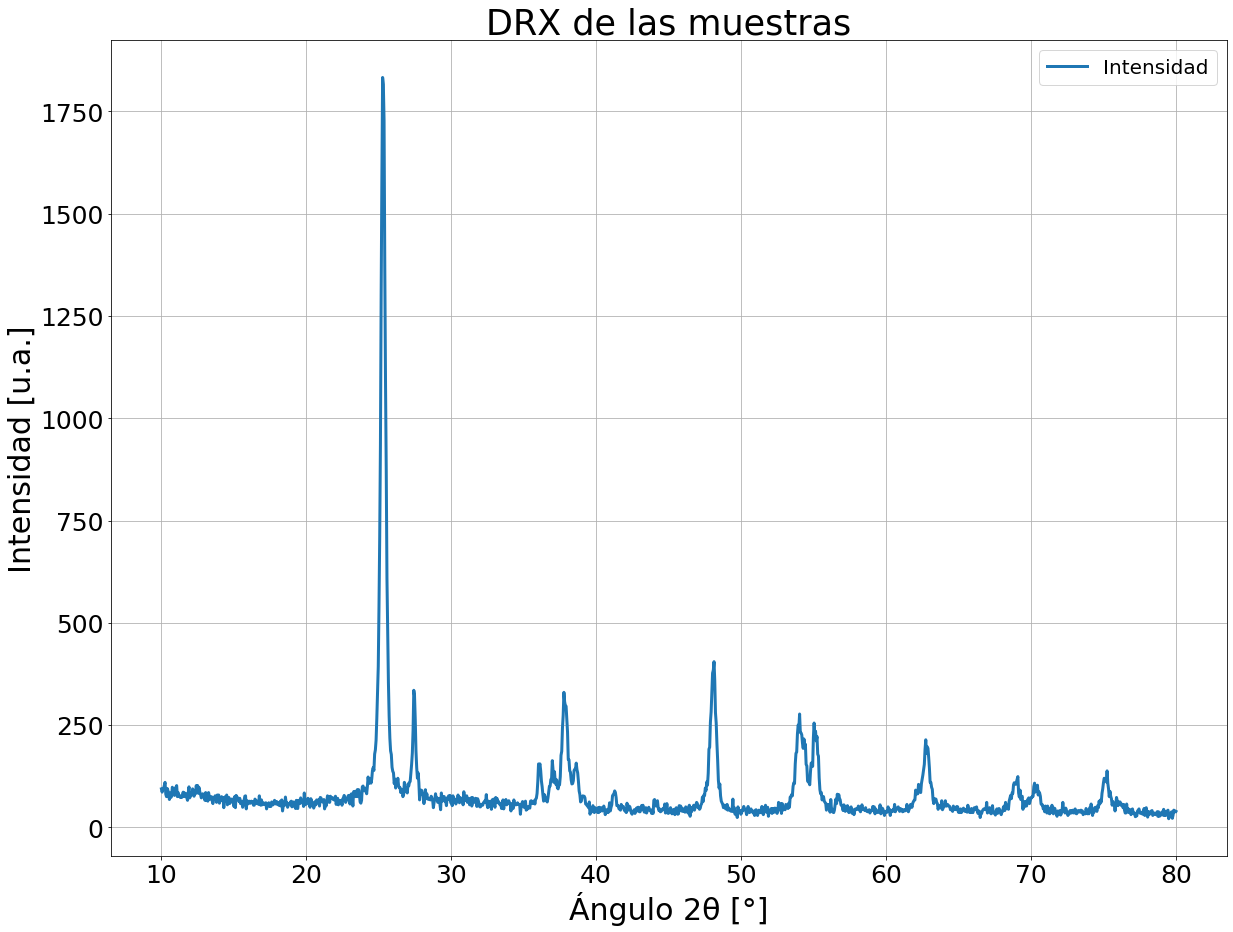

In [48]:
fig, ax=plt.subplots(1,1, figsize=(20,15))

ax.plot(df4['ang'], df4['I'], lw=3,label='Intensidad')

ax.set_xlabel("Ángulo 2θ [°]", fontsize=30)
ax.set_ylabel("Intensidad [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title("DRX de las muestras", fontsize=35)
ax.legend(fontsize=20)
ax.grid()
plt.show()
